<a href="https://colab.research.google.com/github/ptandon0/FRP_Curriculum_2023/blob/main/FRP_Curriculum_Getting_and_Knowing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="http://cds-dev01.mountsinai.org/">
<img src='https://upload.wikimedia.org/wikipedia/commons/b/b1/Mount_Sinai_Health_System_Logo.jpg' alt="Drawing" style="width: 300px;float: left;"> </a>

# **Fellows Research Program - Getting and Knowing Data**

Before you start addressing your research questions, you should have a familiarity with the data you are working with.

This process is called *data exploration*. You should have some understanding of what data you have fetched, and what its limitations are, and what it can do for you before using it for further work.

Here we are using an interactive python code notebook to obtain and explore a dataset; however, ignore the code and focus more on the questions we are asking and looking at the tables and figures.

## **What are some questions to ask about your data when you first recieve a dataset?**

In [ ]:
#@title Fellows Responses Go Here!

import ipywidgets as widgets
from IPython.display import display, Markdown
button = widgets.Button(description="Add Response!")
inp = widgets.Text(description='response:')
Box = widgets.HBox([inp, button])

value_list = []

def on_button_clicked(b):
    value_list.append(inp.value)
    display(Markdown(("- " + value_list.pop())))

button.on_click(on_button_clicked)
Box

In [ ]:
#@title Questions I think of when getting a new dataset for the first time are:

text = """
- What is the size of my dataset?
- How many columns and how many rows?
- Also are any rows duplicated?
- What does each row mean?
- How are rows linked?
- What datatypes are in each column? (strings, numbers, other)
- How much missingness is there, and are missing data random?
- What are the distinct values in each categorical column? How are they distributed?
- What is the distribution of data in each numerical column?
- Are any of the rows colinear or directly related to each other?
"""

display(Markdown(text))


## **Let's Practice with a very popular learning dataset - the Chipotle Orders Dataset from Kaggle** ##

## **Importing and first impressions of dataset** ##

<a href="http://cds-dev01.mountsinai.org/">
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Chipotle_Brandon.jpeg/2880px-Chipotle_Brandon.jpeg' alt="Drawing" style="width: 200px;float: left;"> </a>

In [ ]:
#@title Importing libaries and chipotle data

import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats

%matplotlib inline

# import chipotle dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')


### First, just look through the data with your eyes and scroll around.

In [ ]:
#@title What do you see?

chipo.head(50)

In [ ]:
#@title What is the size of this dataset?
print("There are", chipo.shape[0], "rows and", chipo.shape[1],"columns in this dataset.")

In [ ]:
#@title Are Any Rows Duplicated?

print("There are", chipo.shape[0] - chipo.drop_duplicates().shape[0], "duplicate rows in this dataset")

In [ ]:
#@title What Do the Duplicate Rows Look Like?

print("The duplicate rows are:")
chipo[chipo.duplicated(keep=False)]

In [ ]:
#@title Remove the duplicate rows.

chipo = chipo.drop_duplicates()
print("The dataset without duplicates has", chipo.shape[0], "rows and", chipo.shape[1], "columns. \n It looks like this:")
chipo.head(20)

### What does each row mean?

### What are the column names?

### Are rows linked?

### What is your expected datatype in each column?

In [ ]:
#@title Show the actual datatypes in each column
chipo.dtypes

Choice Description just says "object" and I'm not sure what is inside or its structure. Lets open up that one column so we can read the whole text and see what we can find out.

In [ ]:
#@title Look inside choice description column
list(chipo.choice_description.head(50))

In [ ]:
#@title What is the datatype and underlying structure to the choice_description column?

text = """
- Drinks have a string of a list with a single element which flavor of izze.
- Entres have a string version of [[salsas1, salsa2], [topping1, topping2]].
- But if there is only one element in each list they have it as just [salsa, [topping1, topping2]] or [[salsa1, salsa2], topping].
- From what we have seen we cannot know if there are any entres with no toppings or no salsas.
- This will pose specific cleaning issues later on if we chose to explore toppings and salsas.
"""

button = widgets.Button(description="Show Response!")
Box = widgets.HBox([button])

value_list = []

def on_button_clicked(b):
    display(Markdown(text))

button.on_click(on_button_clicked)
Box

### Can we transform the item_price column into something workable?

The price column is a string of text that starts with "$", followed by a number with two decimal places. To do things like calculate cost per order we need to discard the dollar sign and transfrom the text into a decimal number we can add/subtract/multiply/etc.


In [ ]:
#@title Add numeric price column, add price per item column

chipo["total_price"] = chipo.item_price.str.slice(1).apply(float)
chipo["price_per_item"] = chipo.total_price / chipo.quantity

print(chipo.dtypes)
chipo.head(10)

In [ ]:
#@title What data are missing? Is there a pattern?


chipo.isna().sum()

Only choice_description is null. Lets see what is null there.

In [ ]:
#@title Only choice_description is null. Lets see what is null there.
chipo[chipo.choice_description.isnull()]


In [ ]:
#@title Lets look at all the unique items with no choice description
print("The items with null choice_description are:")
chipo[chipo.choice_description.isnull()].item_name.unique().tolist()

Only assorted chips +/- salsa and bottled water have a null choice description.

## **Let's assess what some of the values are in the dataset** ##

### Can we generally describe the numerical values in the dataset? Most of your data handling environments will have a "describe' function of some kind.

In [ ]:
chipo.describe()

This is one good way to *look for outliers*. What sticks out to you?

- somebody ordered 15 of one thing in an order?

- What item costs $44?

- What item only costs $1.09?


In [ ]:
chipo.sort_values("quantity", ascending=False).head(10)

In [ ]:
chipo.sort_values("price_per_item")

##Can we visualize some of the distribution?

In [ ]:
#@title What is the distribution of total price per line item?

ax = chipo.total_price.hist()
ax.set_title("Distribution of total price per line item")

In [ ]:
#@title What about for the quantity of items per order?
print(chipo.groupby("order_id")["quantity"].sum().describe())

ax  = chipo.groupby("order_id")["quantity"].sum().hist()
ax.set_title("Distribution of quanity items per order ")

In [ ]:
#@title What is the distribution of total price per order?
print(chipo.groupby("order_id")["total_price"].sum().describe())
ax = chipo.groupby("order_id")["total_price"].sum().hist()
ax.set_title("Distribution of total price per order")

In [ ]:
#@title Is the price per item constant, or does it vary over time and or store?
by_item = chipo.groupby("item_name").agg({"price_per_item": ["max", "min"]})
by_item["item_price_range"] = round(by_item["price_per_item"]["max"] - by_item["price_per_item"]["min"],2)
by_item_out = by_item[by_item.item_price_range > 0].sort_values("item_price_range", ascending=False)
by_item_out

In [ ]:
#@title Can we visualize the price variation per item?

ax = by_item.item_price_range.hist()
ax.set_title("Distribution of range of prices per item")

Beautiful bimodal distribution with drinks, chips and water on one side with almost no price variance, and main dishes on the other side which vary in price a lot.

## What about the categorical data, what does it look like? ###

In [ ]:
#@title Item Names - what are the unique items sold?
chipo.item_name.unique().tolist()

In [ ]:
#@title How many of each are sold? What are the top and bottom sellers?
chipo.groupby("item_name")["order_id"].count().sort_values(ascending=False)

In [ ]:
#@title Can we make this into a visual graph?
chipo.groupby("item_name")["order_id"].count().sort_values(ascending=False).plot(kind="bar")

In [ ]:
#@title This is very busy, why don't we separate it out into drinks, sides, and mains?

drinks = ['Izze','Nantucket Nectar','Bottled Water', '6 Pack Soft Drink', 'Canned Soda', 'Canned Soft Drink', ]

sides = ['Chips and Fresh Tomato Salsa','Chips and Tomatillo-Green Chili Salsa','Side of Chips','Chips and Guacamole','Chips and Tomatillo Green Chili Salsa','Chips','Chips and Tomatillo Red Chili Salsa',
          'Chips and Roasted Chili-Corn Salsa','Chips and Roasted Chili Corn Salsa','Chips and Tomatillo-Red Chili Salsa','Chips and Mild Fresh Tomato Salsa']


mains = list(set(chipo.item_name) - set(drinks) - set(sides))

print("The drinks are", drinks)
print("The sides are", sides)
print("The mains are", mains)

In [ ]:
#@title What are the most popular drinks?

ax = chipo[chipo.item_name.isin(drinks)].groupby("item_name")["quantity"].sum().sort_values(ascending=False).plot(kind="bar", rot = -45)
ax.set_title("Number of drinks ordered in Chipotle Orderset")

In [ ]:
#@title What are the most popular sides?

ax = chipo[chipo.item_name.isin(sides)].groupby("item_name")["quantity"].sum().sort_values(ascending=False).plot(kind="bar", rot = -70)
ax.set_title("Number of sides ordered in Chipotle Orderset")

In [136]:
#@title Does this graph seem right to you?

text = """
#### How is it possible that Chips and fresh tomato salsa is the least seller??

#### Notice that many of these sides are actually synonyms of each other with slightly different text.

#### "Mild Fresh Tomato" vs "Fresh Tomato"; "Tomatillo-Green" vs "Tomatillo Green"

#### If we didn't catch this and then started working, the result would be wrong.

#### The same error is visible in the previous graph as "Canned Soft Drink" vs "Canned Soda"

#### We need to clean this up.
"""


display(Markdown(text))


#### How is it possible that Chips and fresh tomato salsa is the least seller??

#### Notice that many of these sides are actually synonyms of each other with slightly different text.

#### "Mild Fresh Tomato" vs "Fresh Tomato"; "Tomatillo-Green" vs "Tomatillo Green"

#### If we didn't catch this and then started working, the result would be wrong.

#### The same error is visible in the previous graph as "Canned Soft Drink" vs "Canned Soda"

#### We need to clean this up.


Text(0.5, 1.0, 'Number of sides ordered in Chipotle Orderset')

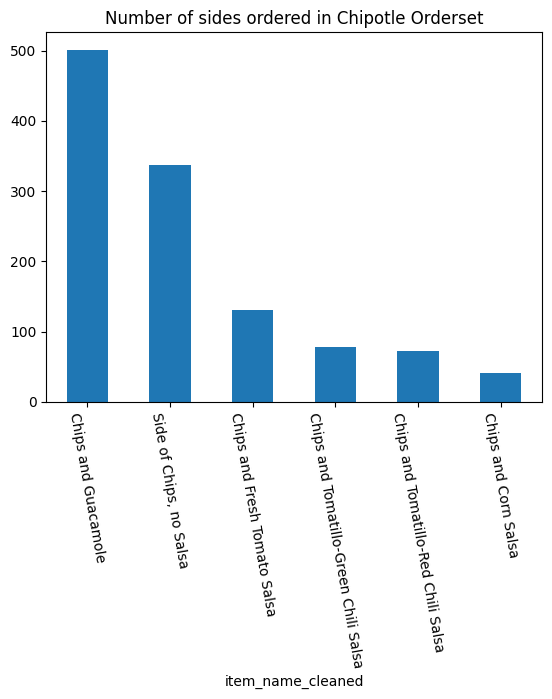

In [137]:
#@title Clean up the item names with a map of dirty and clean names and re-plot

drinks_dict = {
  'Izze':'Izze',
 'Nantucket Nectar':"Nantucket Nectar",
 'Bottled Water':"Bottled Water",
 '6 Pack Soft Drink':"6 Pack Soft Drink",
 'Canned Soda':'Canned Soda',
 'Canned Soft Drink':'Canned Soda'
}

mains_dict = {
 'Veggie Burrito':'Veggie Burrito',
 'Barbacoa Bowl': 'Barbacoa Bowl',
 'Barbacoa Soft Tacos': 'Barbacoa Soft Tacos',
 'Steak Salad': 'Steak Salad',
 'Carnitas Soft Tacos': 'Carnitas Soft Tacos',
 'Carnitas Bowl': 'Carnitas Bowl',
 'Barbacoa Crispy Tacos':'Barbacoa Crispy Tacos',
 'Chicken Salad':'Chicken Salad',
 'Carnitas Burrito':'Carnitas Burrito',
 'Steak Crispy Tacos': 'Steak Crispy Tacos',
 'Chicken Soft Tacos': 'Chicken Soft Tacos',
 'Veggie Salad': 'Veggie Salad',
 'Veggie Salad Bowl': 'Veggie Salad',
 'Veggie Crispy Tacos': 'Veggie Crispy Tacos',
 'Crispy Tacos':'Unk Crispy Tacos',
 'Bowl': 'Unk Bowl',
 'Chicken Burrito':'Chicken Burrito',
 'Burrito':'Unk Burrito',
 'Steak Soft Tacos':'Steak Soft Tacos',
 'Carnitas Salad':'Carnitas Salad',
 'Chicken Crispy Tacos':'Chicken Crispy Tacos',
 'Barbacoa Salad Bowl':'Barbacoa Salad Bowl',
 'Steak Burrito':'Steak Burrito',
 'Carnitas Salad Bowl':'Carnitas Salad Bowl',
 'Steak Bowl':"Steak Bowl",
 'Salad':'Unk Salad',
 'Steak Salad Bowl':'Steak Salad',
 'Barbacoa Burrito':'Barbacoa Burrito',
 'Chicken Salad Bowl':'Chicken Salad',
 'Veggie Bowl':'Veggie Bowl',
 'Veggie Soft Tacos':'Veggie Soft Tacos',
 'Carnitas Crispy Tacos':'Carnitas Crispy Tacos',
 'Chicken Bowl':'Chicken Bowl'
}

sides_dict = {'Chips and Fresh Tomato Salsa' : "Chips and Fresh Tomato Salsa",
 'Chips and Tomatillo-Green Chili Salsa': 'Chips and Tomatillo-Green Chili Salsa',
 'Side of Chips':'Side of Chips, no Salsa',
 'Chips and Guacamole': 'Chips and Guacamole',
 'Chips and Tomatillo Green Chili Salsa': 'Chips and Tomatillo-Green Chili Salsa',
 'Chips':'Side of Chips, no Salsa',
 'Chips and Tomatillo Red Chili Salsa':'Chips and Tomatillo-Red Chili Salsa',
 'Chips and Roasted Chili-Corn Salsa':'Chips and Corn Salsa',
 'Chips and Roasted Chili Corn Salsa':'Chips and Corn Salsa',
 'Chips and Tomatillo-Red Chili Salsa':'Chips and Tomatillo-Red Chili Salsa',
 'Chips and Mild Fresh Tomato Salsa':'Chips and Fresh Tomato Salsa'}

names_dict = {}
names_dict.update(drinks_dict)
names_dict.update(sides_dict)
names_dict.update(mains_dict)

chipo["item_name_cleaned"] = chipo.item_name.apply(lambda x: names_dict[x])
ax = chipo[chipo.item_name.isin(sides_names)].groupby("item_name_cleaned")["quantity"].sum().sort_values(ascending=False).plot(kind="bar", rot = -80)
ax.set_title("Number of sides ordered in Chipotle Orderset")

In [138]:
#@title Ah, this is better

display(Markdown("Who orders chips and corn salsa? Makes sense it is the least popular"))

Who orders chips and corn salsa? Makes sense it is the least popular

Text(0.5, 1.0, 'Number of mains ordered in Chipotle Orderset')

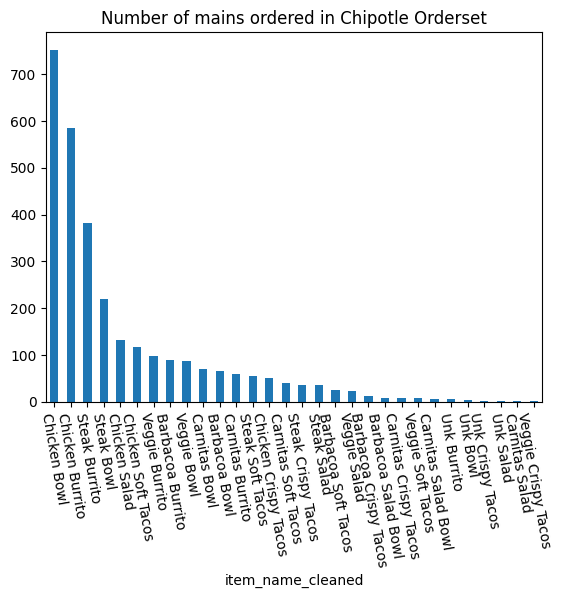

In [139]:
#@title What are the most popular mains?
ax = chipo[chipo.item_name.isin(mains)].groupby("item_name_cleaned")["quantity"].sum().sort_values(ascending=False).plot(kind="bar", rot = -80)
ax.set_title("Number of mains ordered in Chipotle Orderset")

#### If we wanted to we could do things like figure out what kind of izze is most popular, split the mains into tacos, bowls, burritos, and salads, etc.

## **Surely a lot of this must be automated by now?** ##

### Why yes, there are premade packages you can use to explore data. Especially as we start looking at 2x2 correlations. ###

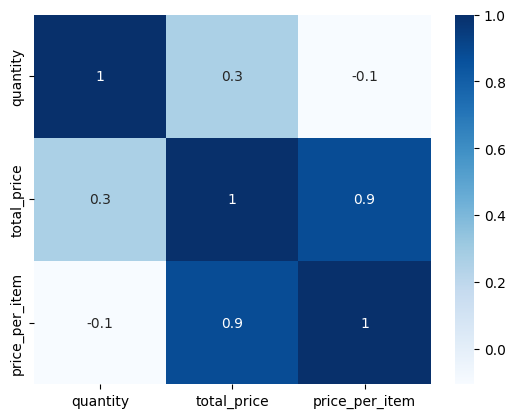

In [140]:
#@title Plot correlation heatmap of numeric data in the dataframe.

corr = chipo[["quantity", "item_name", "total_price", "price_per_item"]].corr(numeric_only=True)

heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')



As Expected, because total price = price per item * quantity, the correlation between these are 0.9.

 Price_per_item and quantity are not directly correlated, this makes sense because the price doesn't change if you buy more or less (i.e. no bulk discount)

 Let's visualize that by doing a pairwise scatterplot.

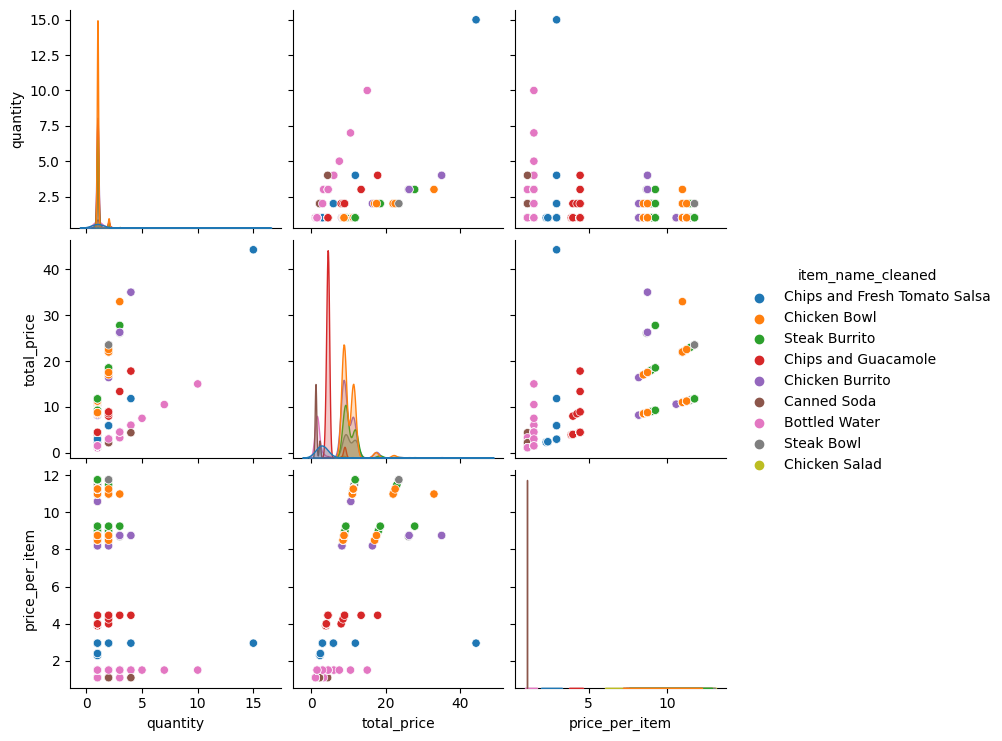

In [134]:
#@title Plot a pair plot grouped by cleaned item name for the top 10 items.

top10 = chipo.groupby("item_name_cleaned")["quantity"].sum().sort_values(ascending=False).head(10).index.tolist()

sns.pairplot(chipo[chipo.item_name.isin(top10)][["quantity", "item_name_cleaned", "total_price", "price_per_item"]], hue="item_name_cleaned")

In [135]:
#@title What are some things we can notice?

text = """
## Total Price vs Quantity (r=0.3)
- Line item price and quanity are actually perfectly correlated within each item (that might be obvious)
- The slope of the line is a surrogate for price.
- Water (lavender) is cheap - slope is most flat
- Chips and guac (red) are medium priced, so slope is midling
- Chicken burrito and Chicken bowl (purple and orange) are expensive, buying more greatly increases the price - slope is very high.

## Quantity vs Price per Item (r=-0.1)

Notice two groupings; one is high price low quantity
- steak burrito, chicken bowl, chicken burrito, steak bowl, chicken salad

One is low price higher quantity
- chips and guac, chips and salsa, bottled water, canned soda
"""

display(Markdown(text))


## Total Price vs Quantity (r=0.3)
- Line item price and quanity are actually perfectly correlated within each item (that might be obvious)
- The slope of the line is a surrogate for price.
- Water (lavender) is cheap - slope is most flat
- Chips and guac (red) are medium priced, so slope is midling
- Chicken burrito and Chicken bowl (purple and orange) are expensive, buying more greatly increases the price - slope is very high.

## Quantity vs Price per Item (r=-0.1)

Notice two groupings; one is high price low quantity 
- steak burrito, chicken bowl, chicken burrito, steak bowl, chicken salad

One is low price higher quantity
- chips and guac, chips and salsa, bottled water, canned soda


#### Google colab also provides a built-in data explorer, click the icons next to the raw dataframe

In [ ]:
chipo

## **Now you have a pretty good sense of what is in the dataset, began cleaning it, and will be able to move forward to answer questions you may have.** ##

## **Don't put patient data into colab** ##